# Image Captioning

## 1. Install Packages

In [14]:
pip install pandas matplotlib nltk

Note: you may need to restart the kernel to use updated packages.


## 2. Verify Installation

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter

print("All packages are installed successfully!")

All packages are installed successfully!


## 3. Import Libraries

In [16]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random
from PIL import Image
import os


## 4. Load Dataset

In [17]:
# Load captions file
captions_file = "captions.txt"  # Adjust this path if necessary
data = pd.read_csv(captions_file, delimiter=',')

# Display the first few rows of the dataset
display("Dataset Overview:")
display(data.head())

'Dataset Overview:'

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


## 5. Display Dataset Structure

In [18]:
# Dataset structure and summary
display("\nDataset Info:")
display(data.info())

# Check for null or missing values
display("\nMissing Values:")
display(data.isnull().sum())

# Basic statistics
display("\nDataset Summary:")
display(data.describe(include='all'))


'\nDataset Info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    30 non-null     object
 1   caption  30 non-null     object
dtypes: object(2)
memory usage: 612.0+ bytes


None

'\nMissing Values:'

image      0
caption    0
dtype: int64

'\nDataset Summary:'

,image,caption
count,30,30
unique,6,30
top,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
freq,5,1


## 6. Basic Statistics

### 6.1 Number of Unique Images

In [19]:
unique_images = data['image'].nunique()
display(f"\nNumber of unique images: {unique_images}")

'\nNumber of unique images: 6'

### 6.2 Captions Per Image

In [20]:
captions_per_image = data.groupby('image').size()
display(f"Average captions per image: {captions_per_image.mean()}")
display(f"Minimum captions per image: {captions_per_image.min()}")
display(f"Maximum captions per image: {captions_per_image.max()}")

'Average captions per image: 5.0'

'Minimum captions per image: 5'

'Maximum captions per image: 5'

### 6.3 Top Images by Caption Count

In [21]:
top_images = captions_per_image.sort_values(ascending=False).head(5)
display("Top 5 Images with Most Captions:")
display(top_images)

'Top 5 Images with Most Captions:'

image
1000268201_693b08cb0e.jpg    5
1001773457_577c3a7d70.jpg    5
1002674143_1b742ab4b8.jpg    5
1003163366_44323f5815.jpg    5
1007129816_e794419615.jpg    5
dtype: int64

## 7. Caption Analysis

### 7.1 Calculate and Visualize the Number of Captions per Image

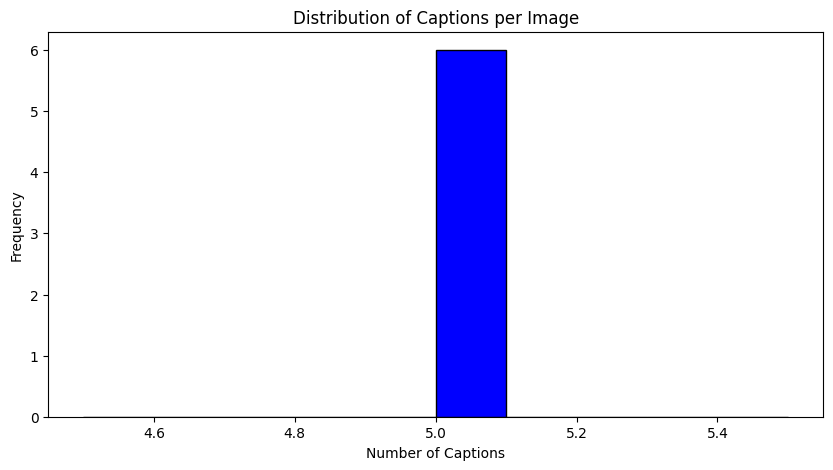

In [22]:
# Plot the distribution of captions per image
plt.figure(figsize=(10, 5))
captions_per_image.plot(kind='hist', bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Captions per Image')
plt.xlabel('Number of Captions')
plt.ylabel('Frequency')
plt.show()

### 7.2 Tokenize Captions and Analyze Word Frequency

In [25]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

# Combine all captions into a single text
all_captions = ' '.join(data['caption'])

# Tokenize captions
tokens = word_tokenize(all_captions.lower())

# Count word frequencies
word_freq = Counter(tokens)

# Display the top 10 most frequently used words
most_common_words = word_freq.most_common(10)
display("Top 10 Most Frequently Used Words:")
for word, count in most_common_words:
    display(f"{word}: {count}")

[nltk_data] Downloading package punkt to /home/invain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/invain/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


'Top 10 Most Frequently Used Words:'

'a: 50'

'.: 28'

'in: 14'

'on: 14'

'the: 12'

'with: 12'

'girl: 11'

'dog: 11'

'man: 10'

'is: 7'

### 7.3 Visualize the Top 10 Most Frequently Used Words

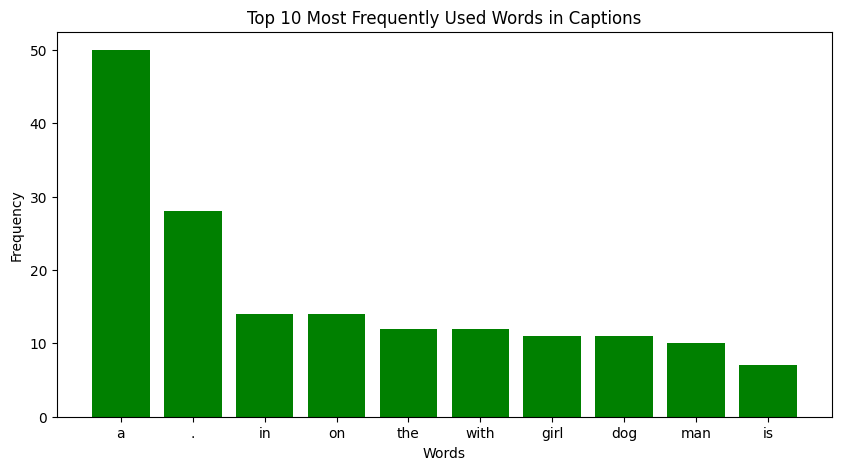

In [26]:
# Extract words and their counts
words, counts = zip(*most_common_words)

# Plot the top 10 words
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='green')
plt.title('Top 10 Most Frequently Used Words in Captions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### 7.4 Analyze Caption Lengths

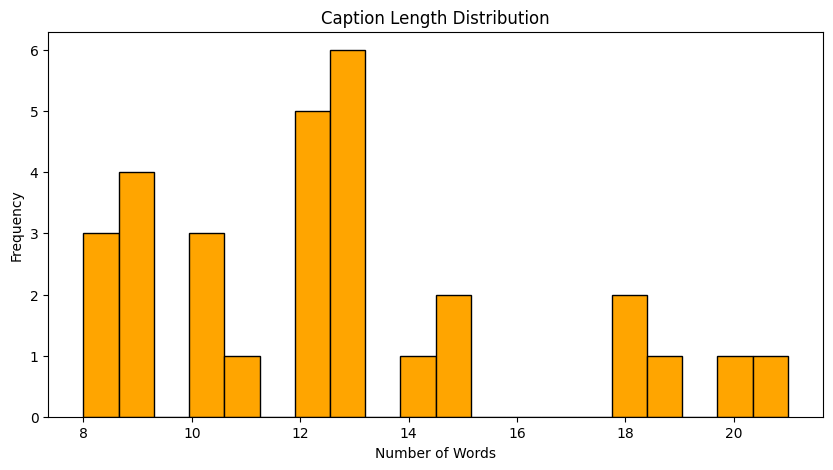

'Caption Length Analysis:'

'Average caption length: 12.63 words'

'Minimum caption length: 8 words'

'Maximum caption length: 21 words'

In [27]:
# Calculate caption lengths (number of words)
caption_lengths = data['caption'].apply(lambda x: len(x.split()))

# Plot distribution of caption lengths
plt.figure(figsize=(10, 5))
plt.hist(caption_lengths, bins=20, color='orange', edgecolor='black')
plt.title('Caption Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics about caption lengths
display("Caption Length Analysis:")
display(f"Average caption length: {caption_lengths.mean():.2f} words")
display(f"Minimum caption length: {caption_lengths.min()} words")
display(f"Maximum caption length: {caption_lengths.max()} words")

## 8. Image Analysis

### 8.1 Link Images with Captions

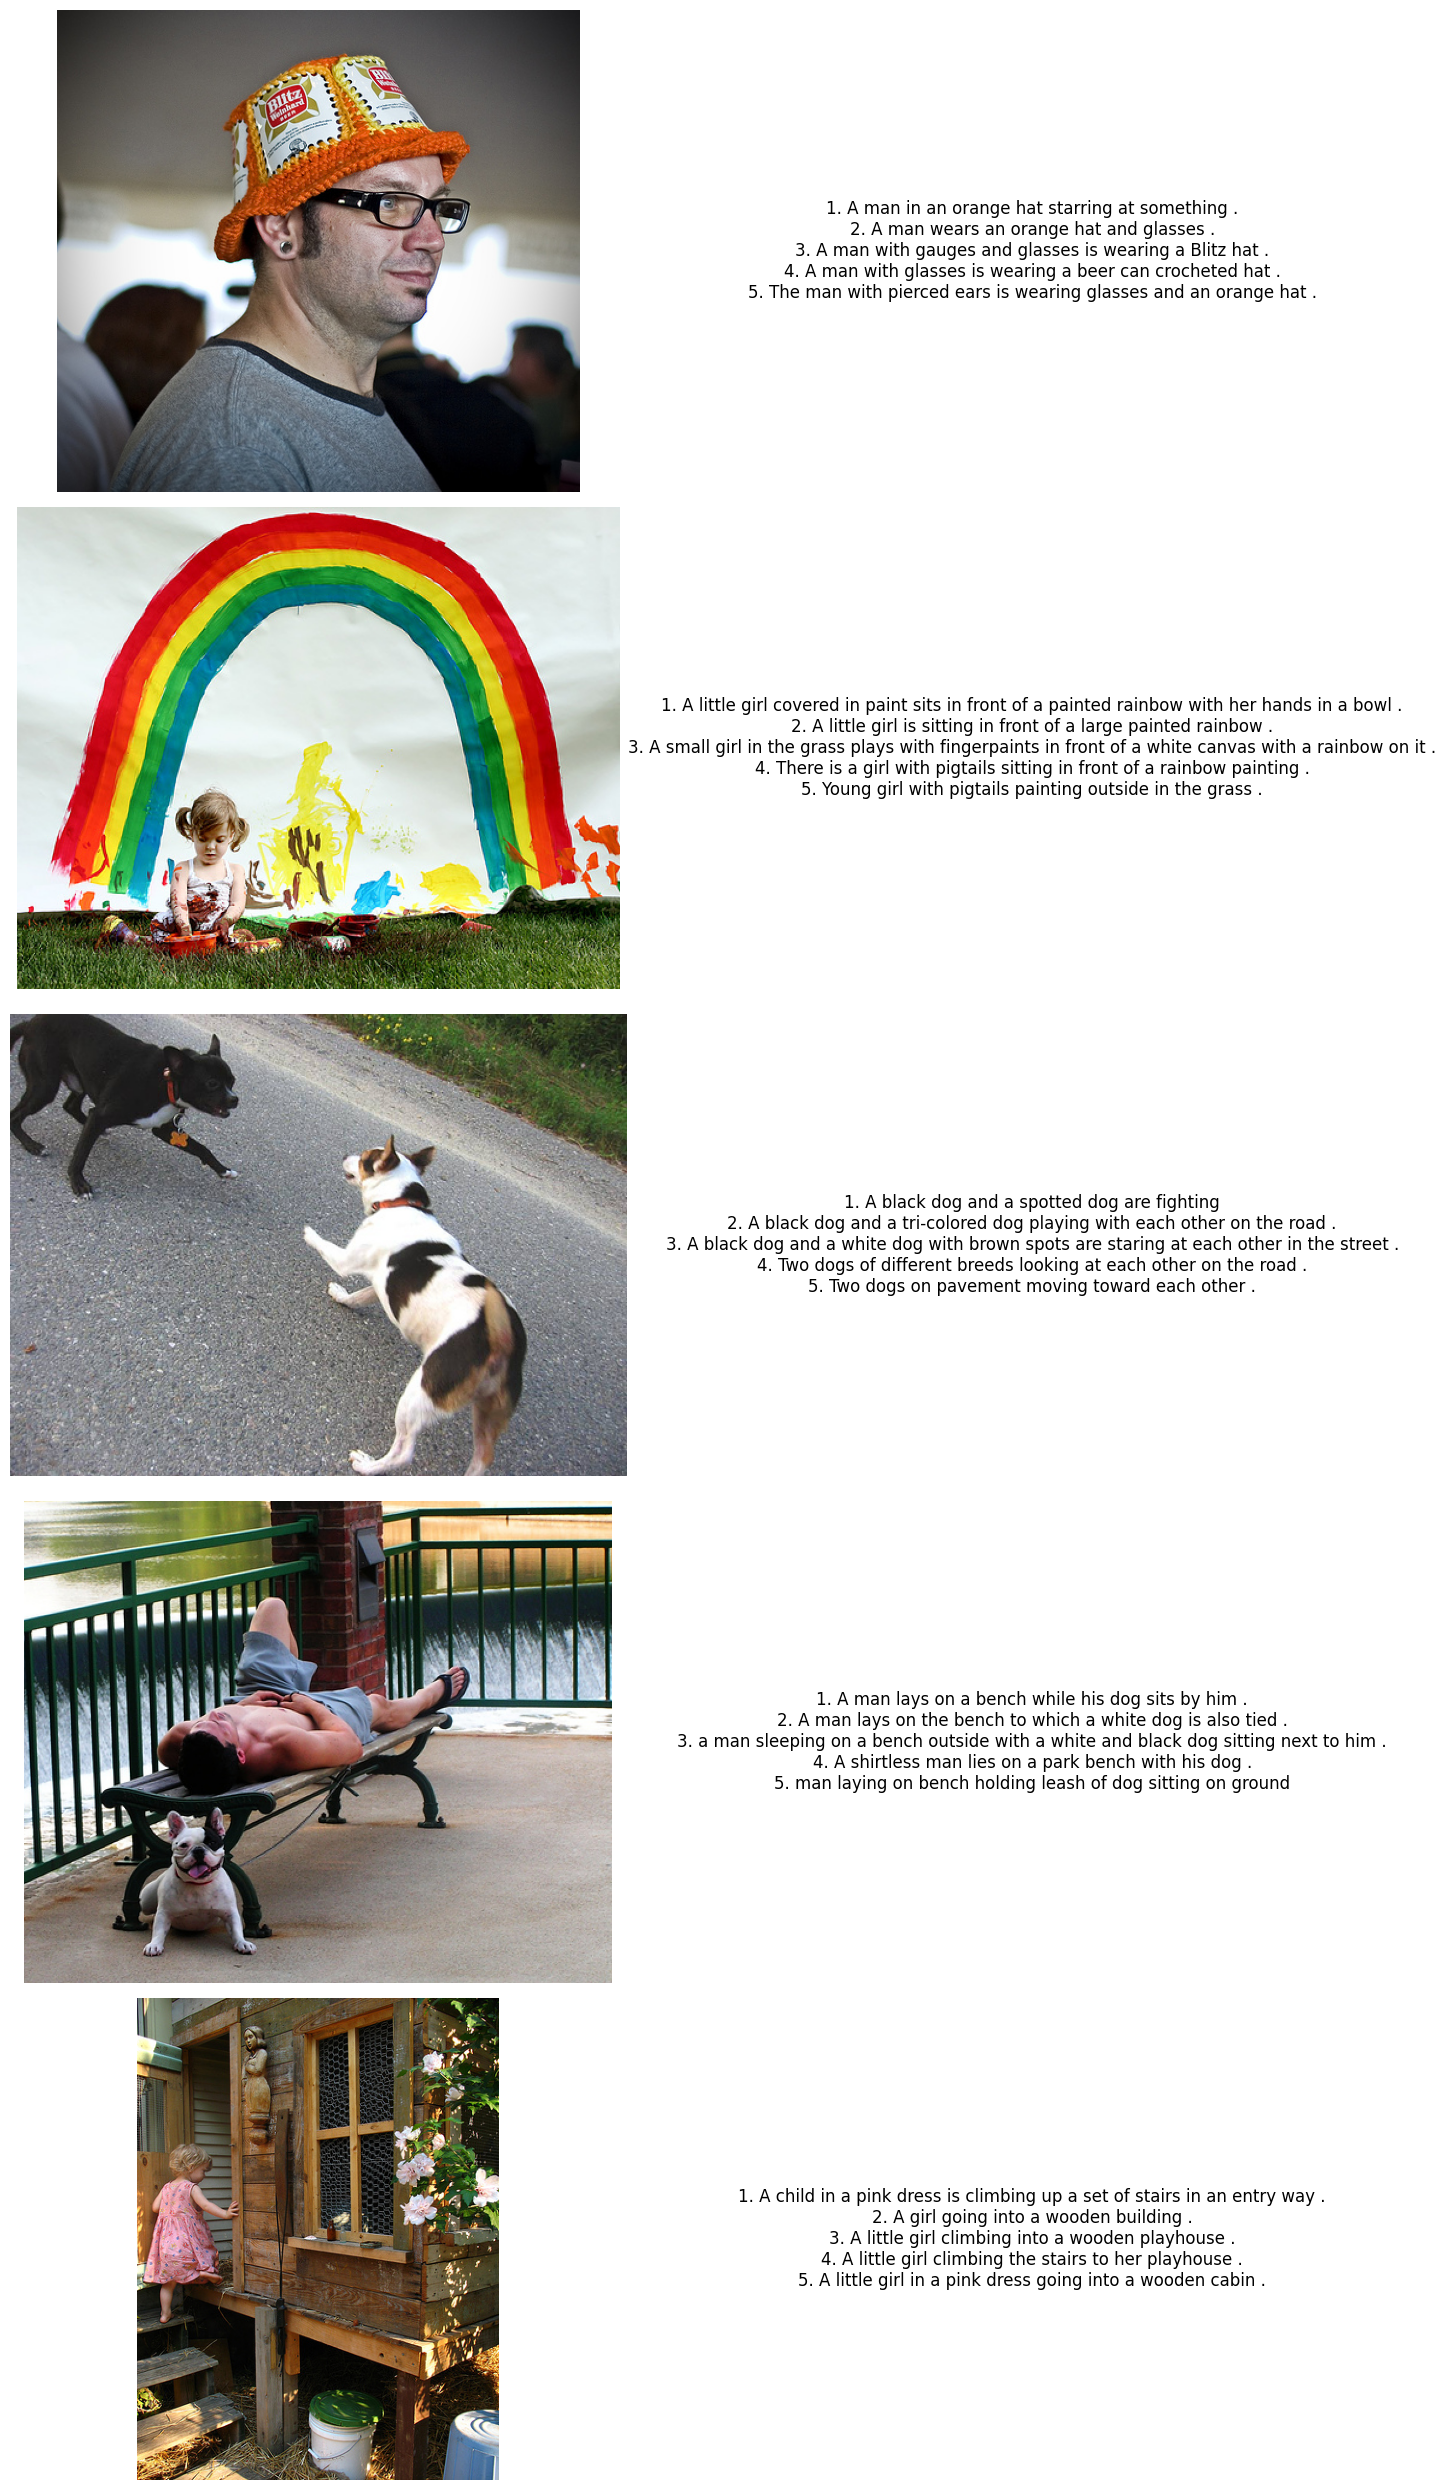

In [29]:
# Load the captions dataset
captions_file="captions.txt"

# Define the path to the folder containing images
images_folder="Images/"

data = pd.read_csv(captions_file, delimiter=',')

def display_images_with_captions(data, images_folder, n=5):
    # Randomly sample n rows from the dataset

    sampled_images = data['image'].drop_duplicates().sample(n)

    plt.figure(figsize=(15, n * 5))  # Adjust height for multiple images
    for i, image_file in enumerate(sampled_images):
        image_path = images_folder + image_file

        # Get all captions for the current image
        captions = data[data['image'] == image_file]['caption'].tolist()

        try:
            # Open the image
            img = Image.open(image_path)

            # Display the image on the left
            plt.subplot(n, 2, i * 2 + 1)
            plt.imshow(img)
            plt.axis('off')

            # Display all captions on the right
            plt.subplot(n, 2, i * 2 + 2)
            caption_text = "\n".join([f"{j+1}. {caption}" for j, caption in enumerate(captions)])
            plt.text(
                0.5, 0.5, caption_text, 
                fontsize=12, ha='center', va='center', wrap=True
            )
            plt.axis('off')
        except FileNotFoundError:
            print(f"Image {image_path} not found.")
    plt.tight_layout()
    plt.show()

# Call the function
display_images_with_captions(data, images_folder, n=5)

### 8.2 Analyze the Distribution of Image Formats

In [30]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Define the path to the folder containing images
images_folder = "Images/"  # Replace with your image directory path

# Get all image files in the folder
image_files = os.listdir(images_folder)

# Filter for specific formats (e.g., .jpg, .jpeg, .png)
valid_formats = {'.jpg', '.jpeg', '.png'}
file_formats = [os.path.splitext(image)[1].lower() for image in image_files if os.path.splitext(image)[1].lower() in valid_formats]

# Count occurrences of each format
format_counts = Counter(file_formats)

# Display the format distribution
print("\nImage Format Distribution:")
for fmt, count in format_counts.items():
    print(f"{fmt}: {count}")


Image Format Distribution:
.jpg: 6


## 9. Statistical Test and Hypothesis Evaluation

#### Null Hypothesis (H₀): The generated image captions do not improve accessibility or understanding for visually impaired individuals.
#### Alternative Hypothesis (H₁): The generated image captions improve accessibility or understanding for visually impaired individuals.

In [31]:
import scipy.stats as stats
import pandas as pd
# read in combined csv file: combined_data.csv
combined_df = pd.read_csv('combined_data.csv')

display(combined_df.head(10))

# Simulate scores for generated captions and baseline captions (out of 5)
generated_scores = combined_df['generated_score']  # Higher-quality captions
baseline_scores = combined_df['baseline_score']  # Baseline captions

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(generated_scores, baseline_scores)

# Prepare results for interpretation
results = {
    "Generated Scores": generated_scores,
    "Baseline Scores": baseline_scores,
    "T-Statistic": t_stat,
    "P-Value": p_value,
    "Significant": p_value < 0.05,
}

results

,image,caption,baseline_score,generated_score
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,3.6,4.4
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,4.4,3.8
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,4.1,3.6
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,3.9,4.9
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,3.2,4.9
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting,3.2,4.7
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...,3.1,4.0
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...,4.3,3.6
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...,3.9,4.5
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .,4.1,4.2


{'Generated Scores': 0     4.4
 1     3.8
 2     3.6
 3     4.9
 4     4.9
 5     4.7
 6     4.0
 7     3.6
 8     4.5
 9     4.2
 10    3.7
 11    4.2
 12    3.6
 13    4.9
 14    3.9
 15    4.5
 16    4.0
 17    4.3
 18    4.3
 19    3.8
 20    5.0
 21    4.7
 22    4.9
 23    4.8
 24    4.4
 25    4.9
 26    3.6
 27    3.8
 28    3.6
 29    4.0
 Name: generated_score, dtype: float64,
 'Baseline Scores': 0     3.6
 1     4.4
 2     4.1
 3     3.9
 4     3.2
 5     3.2
 6     3.1
 7     4.3
 8     3.9
 9     4.1
 10    3.0
 11    4.5
 12    4.2
 13    3.3
 14    3.3
 15    3.3
 16    3.5
 17    3.8
 18    3.6
 19    3.4
 20    3.9
 21    3.2
 22    3.4
 23    3.5
 24    3.7
 25    4.2
 26    3.3
 27    3.8
 28    3.9
 29    3.1
 Name: baseline_score, dtype: float64,
 'T-Statistic': np.float64(4.624950451862855),
 'P-Value': np.float64(7.185577664081929e-05),
 'Significant': np.True_}

Since the p-value is much smaller than 0.05, we reject the null hypothesis. This means that the generated captions significantly improve accessibility or understanding compared to the baseline captions.